In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [4]:
data.dropna(inplace=True)

In [5]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [7]:
data['review'] = data['review'].apply(clean_review)

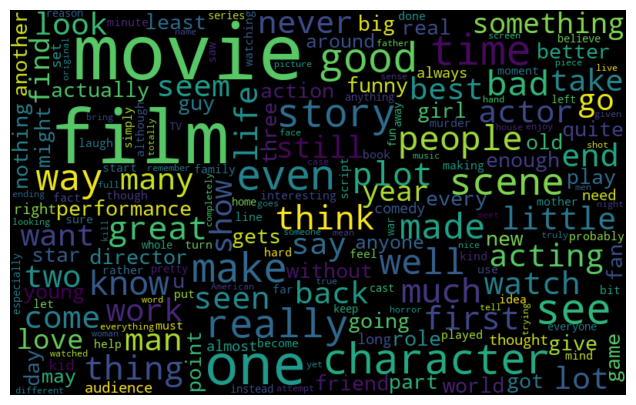

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'text' is the column containing the text data
all_words = ' '.join(data['review'].astype(str).tolist())  # Combine all text into a single string

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

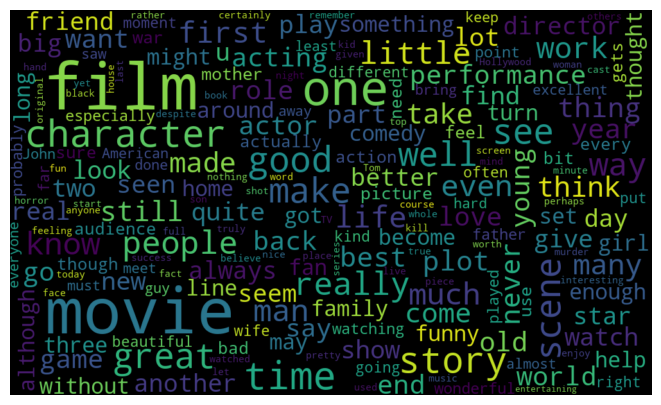

In [23]:
reviews = ' '.join(word for word in data['review'][data['sentiment']== 'positive'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

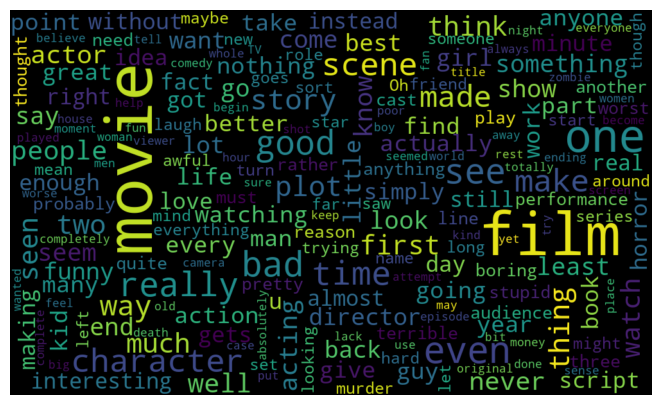

In [24]:
reviews = ' '.join(word for word in data['review'][data['sentiment']== 'negative'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [26]:
reviews = cv.fit_transform(data['review']).toarray()

In [29]:
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])

C:\Users\pc planet\AppData\Local\Temp\ipykernel_21536\3911524901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])


In [31]:
data['sentiment'].value_counts()

sentiment
0    263
1    237
Name: count, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [36]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [37]:
predict = model.predict(reviews_test)

In [40]:
from sklearn.metrics import classification_report


In [50]:
review_predict = model.predict(reviews_train)
print(classification_report(sent_train, review_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       213
           1       0.99      0.96      0.98       187

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



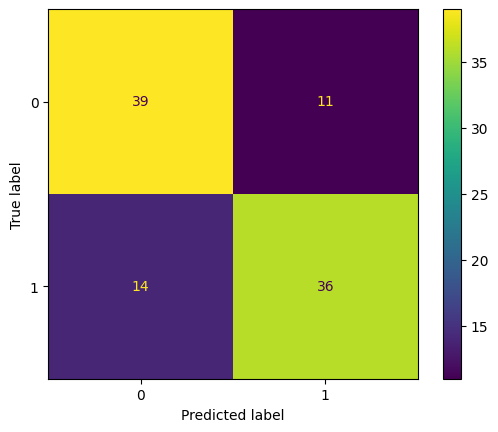

In [43]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
nb_model = GaussianNB()
nb_model = nb_model.fit(reviews_train,sent_train)

In [46]:
predict = model.predict(reviews_test)

In [51]:
review_predict = model.predict(reviews_train)
print(classification_report(sent_train, review_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       213
           1       0.99      0.96      0.98       187

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [52]:
import pickle as pk

In [53]:
pk.dump(model,open('model.pkl','wb'))

In [54]:
pk.dump(cv,open('scaler.pkl','wb'))